# Task 2 Notebook
Run preprocessing, sentiment, keywords/topics, and theme mapping.

In [23]:
import sys
from pathlib import Path
from importlib import reload

# -------------------------------
# 1️⃣ Ensure project root is in sys.path
# -------------------------------
project_root = Path.cwd().parents[0]  # adjust if notebook is inside src/task-2
sys.path.append(str(project_root))

task2_path = project_root / "src" / "task-2"
sys.path.append(str(task2_path))

# -------------------------------
# 2️⃣ Import and reload modules
# -------------------------------
import Script.config as config
reload(config)  # reload to get the updated DATA_PATHS

import utils
reload(utils)   # reload to pick up updated config paths

import _00_preprocess as prep
reload(prep)

# -------------------------------
# 3️⃣ Run preprocessing
# -------------------------------
prep.main()


[nltk_data] Downloading package punkt_tab to C:\Users\hp\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


[nltk_data] Downloading package wordnet to C:\Users\hp\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\hp\nltk_data...


Loading data...
Loading CSV: C:\Users\hp\Desktop\AI projects\fintech-customer-analytics-ml\data\processed\reviews_processed.csv
Auto-selected review column: 'review_text' (avg length 51.1)
Preprocessing text (cleaning, tokenizing, lemmatizing)...
✅ Success! Saved cleaned reviews to C:\Users\hp\Desktop\AI projects\fintech-customer-analytics-ml\data\outputs\reviews_cleaned.csv


In [51]:
# Sentiment
import _01_sentiment as sent
reload(sent)
sent.main()



Loading cleaned data from C:\Users\hp\Desktop\AI projects\fintech-customer-analytics-ml\data\outputs\reviews_cleaned.csv
Running VADER on column: 'cleaned_review'
Saved sentiment_results.csv to C:\Users\hp\Desktop\AI projects\fintech-customer-analytics-ml\data\outputs\sentiment_results.csv
Sentiment coverage: 100.00%
✅ TextBlob and VADER scores saved, ready for correlation plots.


In [33]:
# Keywords & Topics
import _02_keywords_topics as kt
reload(kt)
kt.main()

Loading base data to get 'bank' column...
Loading CSV: C:\Users\hp\Desktop\AI projects\fintech-customer-analytics-ml\data\processed\reviews_processed.csv
Loaded 1200 rows of cleaned data.
Computing TF-IDF keywords per bank...
Running LDA for topic modeling...
✅ Saved tf-idf and lda outputs to outputs/ folder.


In [37]:
# Theme Mapping
import _03_theme_mapping as tm
reload(tm)
tm.main()

✅ Saved outputs/sentiment_thematic.csv


## 

In [ ]:
 

# Load the file created by 03_theme_mapping.py
df_final = pd.read_csv(OUTPUT_DIR / "sentiment_thematic.csv")

# Display key columns: review, sentiment, and mapped themes
display(df_final[[
    "review_text",
    "sentiment_label", 
    "sentiment_score", 
    "themes"
]].head(10))

print(f"\nTotal Reviews Processed: {len(df_final)}")

,review_text,sentiment_label,sentiment_score,themes
0,🙏👍,neutral,0.0000,NaN
1,Very Good,positive,0.4404,NaN
2,goof,neutral,0.0000,NaN
3,good!,positive,0.4404,NaN
4,good jop,positive,0.4404,NaN
5,bad exprience...it is so crushed,negative,-0.7430,NaN
6,not user friendly at all it requires a huge co...,positive,0.4767,UI / UX
7,ምንም የማይ ሰራ,neutral,0.0000,NaN
8,very good,positive,0.4404,NaN
9,most of the time is not working properly,neutral,0.0000,NaN



Total Reviews Processed: 1200


# Visualize Overall Sentiment Distribution

C:\Users\hp\AppData\Local\Temp\ipykernel_2276\3373372776.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


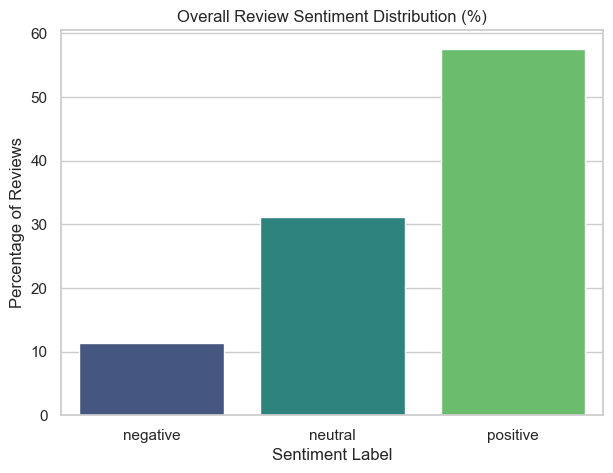

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(7, 5))
sentiment_counts = df_final["sentiment_label"].value_counts(normalize=True).mul(100).sort_index()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

plt.title("Overall Review Sentiment Distribution (%)")
plt.xlabel("Sentiment Label")
plt.ylabel("Percentage of Reviews")
plt.show()

## LDA Topics

In [ ]:

print("--- Latent Dirichlet Allocation (LDA) Topics ---")
topics_file = OUTPUT_DIR / "lda_topics.json"

with open(topics_file, "r") as f:
    topics = json.load(f)

for i, topic_words in enumerate(topics):
    print(f"\n**Topic {i+1}:**")
    # Join the top words for readability
    print(" ".join(topic_words))

--- Latent Dirichlet Allocation (LDA) Topics ---

**Topic 1:**
app please working slow bad bank open time transfer fix money update try using im

**Topic 2:**
app super excellent super app dashen banking option developer fast work service feature bank developer option turn

**Topic 3:**
app good app great need boa phone love dont time thing really every update use new

**Topic 4:**
good like one step one step application always ahead apps well step ahead always one totally keep amole

**Topic 5:**
best doesnt wow work ok doesnt work update always thank experience interface new overall really love

**Topic 6:**
app nice bank best ever worst best app app ever dashen nice app dashen bank worst app bank app financial user

**Topic 7:**
app cant time transaction even bank money like update problem fix take say bug transfer

**Topic 8:**
app banking bank use mobile mobile banking easy amazing ethiopia application cbe easy use banking app one reliable


## Top TF-IDF Keywords Per Bank

In [ ]:

print("--- Top TF-IDF Keywords Per Bank ---")
tfidf_file = OUTPUT_DIR / "tfidf_top_terms.json"

with open(tfidf_file, "r") as f:
    tfidf_results = json.load(f)

# Print results for the first 3 banks
for result in tfidf_results[:3]:
    bank_name = result["bank"]
    # Extract just the terms (first element of the tuple)
    terms = [t[0] for t in result["top_terms"][:10]]
    print(f"\n**{bank_name}** (Top 10 Terms):")
    print(", ".join(terms))

--- Top TF-IDF Keywords Per Bank ---

**Abyssinia Bank** (Top 10 Terms):
good, app, best, nice, boa, great, bank, working, work, like

**Commercial Bank of Ethiopia** (Top 10 Terms):
good, app, best, nice, good app, cbe, excellent, bank, ok, like

**Dashen Bank** (Top 10 Terms):
good, app, nice, best, wow, bank, ok, dashen, super, nice app


# Sentiment Distribution (vader)

--- 📈 Overall Sentiment Distribution Summary ---


,Count,Percentage
sentiment_label,,
negative,136,11.3
neutral,373,31.1
positive,691,57.6


C:\Users\hp\AppData\Local\Temp\ipykernel_2276\742070858.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment_label", data=df_sentiment, order=['negative', 'neutral', 'positive'], palette="coolwarm")


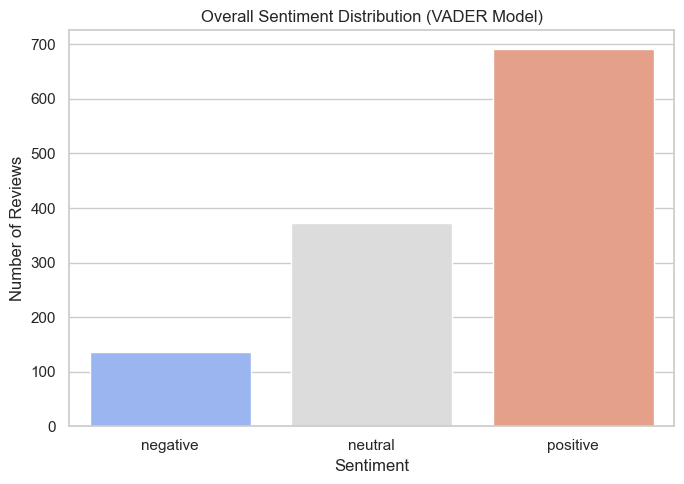

In [ ]:

df_sentiment = pd.read_csv(OUTPUT_DIR / "sentiment_results.csv")

print("--- 📈 Overall Sentiment Distribution Summary ---")

# Calculate counts and percentages
sentiment_counts = df_sentiment["sentiment_label"].value_counts().sort_index()
total_reviews = len(df_sentiment)
    
sentiment_summary = pd.DataFrame({
    "Count": sentiment_counts.values,
    "Percentage": (sentiment_counts.values / total_reviews * 100).round(1)
}, index=sentiment_counts.index)

display(sentiment_summary) # Display table

# Plotting
plt.figure(figsize=(7, 5))
# Assuming MODE was 'vader'
sns.countplot(x="sentiment_label", data=df_sentiment, order=['negative', 'neutral', 'positive'], palette="coolwarm")
plt.title("Overall Sentiment Distribution (VADER Model)")
plt.ylabel("Number of Reviews")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()

# Theme Distribution

--- 📊 Theme Distribution Summary ---


,Theme,Review Count,Percentage
0,Feature Requests,44,3.7
1,Transactions,43,3.6
2,App Stability,39,3.2
3,UI / UX,38,3.2
4,Account Access,34,2.8
5,Customer Support,16,1.3


C:\Users\hp\AppData\Local\Temp\ipykernel_2276\2418654014.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_summary["Theme"], y=theme_summary["Review Count"], palette="viridis")


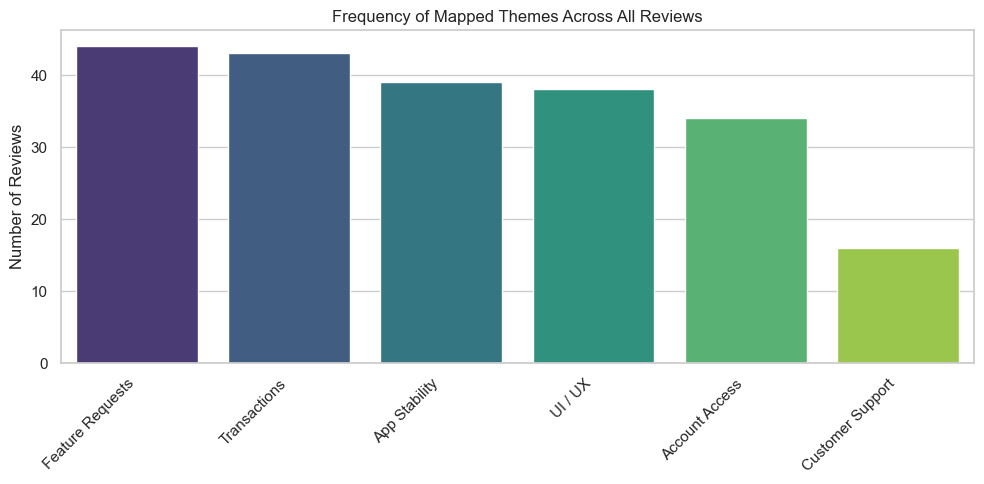

In [ ]:

df_thematic = pd.read_csv(OUTPUT_DIR / "sentiment_thematic.csv")

print("--- 📊 Theme Distribution Summary ---")

# Explode the themes column for counting (since one review can have multiple themes)
theme_series = df_thematic["themes"].str.split(",").explode()
# Filter out empty strings that result from reviews with no matching theme
theme_counts = theme_series[theme_series != ""].value_counts()
    
# Display table
theme_summary = pd.DataFrame({
    "Theme": theme_counts.index,
    "Review Count": theme_counts.values,
    "Percentage": (theme_counts.values / len(df_thematic) * 100).round(1)
})
display(theme_summary) # Display table

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=theme_summary["Theme"], y=theme_summary["Review Count"], palette="viridis")
plt.title("Frequency of Mapped Themes Across All Reviews")
plt.ylabel("Number of Reviews")
plt.xlabel("")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

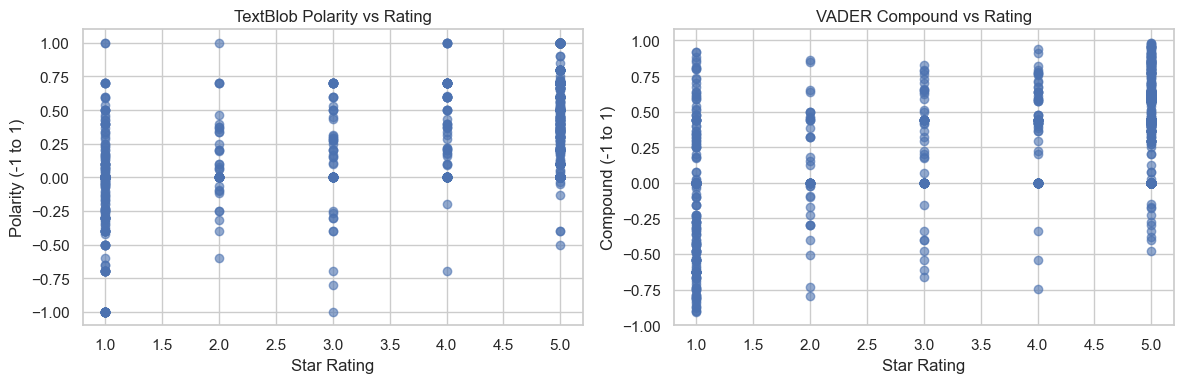

In [52]:
# Cell 5: Lexicon Score Correlation vs Star Rating

df_correlation = pd.read_csv(OUTPUT_DIR / "sentiment_results.csv")

# ⚠️ WARNING: If your 'sentiment_results.csv' only contains VADER scores 
# and not TextBlob scores (tb_polarity), the TextBlob plot (axes[0]) will crash.
# This assumes the full demo code's sentiment analysis columns were merged/saved.

# Check for required columns
required_cols = ['rating', 'tb_polarity', 'vader_compound']
if not all(col in df_correlation.columns for col in required_cols):
    print("⚠️ Cannot run correlation plot: Required columns (rating, tb_polarity, vader_compound) are missing from the loaded file.")
else:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # 1. TextBlob Correlation
    axes[0].scatter(df_correlation["rating"], df_correlation["tb_polarity"], alpha=0.6)
    axes[0].set_title("TextBlob Polarity vs Rating")
    axes[0].set_xlabel("Star Rating")
    axes[0].set_ylabel("Polarity (-1 to 1)")
    
    # 2. VADER Correlation
    axes[1].scatter(df_correlation["rating"], df_correlation["vader_compound"], alpha=0.6)
    axes[1].set_title("VADER Compound vs Rating")
    axes[1].set_xlabel("Star Rating")
    axes[1].set_ylabel("Compound (-1 to 1)")
    
    plt.tight_layout()
    plt.show()